<a id='top'></a>

# Python assignment



|Name|Anr.
|----|-------|
|Alexantro Ntalipai|524206|
|Johannes Karge|924077|






## Impact of health care expenditure on GDP

## Outline

1.1. [Motivation](#Motivation)                                                                                                   
1.2. [Questions](#Questions)                                                                                                     
1.3. [Approach](#Approach)                                                                                                       
1.4. [Assumptions](#Assumptions)                                                                                                 
1.5. [Findings](#Findings)  

2.1  [Libraries](#Libraries)                                                                                                     
2.2  [Data](#Data)                                                                                                               
2.3  [Descriptive statistics](#Descriptivestatistics)                                                                           
2.4  [GDP-Health Expenditure relation](#GDP-HEALTH RELATION)                                                                     
2.5  [Prediction of GDP and Health Expenditure](#PREDICTIONS) 

<a id='Motivation'></a>

#### MOTIVATION

Health care expenditures seem to demand more and more of an individuals' income. With that in mind it is important to explore how this type of expdeniture affects the income on an individual level. As the evidence for climate change and increasing (air) pollution is striking, this assignment wants to examine the relationship between the two more closely. Therefore, we seek to answer the following three main questions.

 <a id='Questions'></a>

#### Questions

i) What is the share of income that goes to health-care expenditures and how has that changed over the years?                   
ii) How does individual health care expenditure relate to a country's GDP per capita?                                           
iii) What is the short-term prediction of health care expenditures and GDP per capita?                                           

<a id='Approach'></a>

#### Approach

1) First we will import our data from the [World Bank](https://data.worldbank.org/) open database. We will explore our data by providing mainly some graphical but also numerical insight in our section of descriptive statistics.

2) Next we will focus on the relation of individual health expenditures and GDP per capita. The first step will be the construction of a [scatter plot](#SCATTER) and Pearson correlation index as a starting hint for any potential relation. 

3) Regressions will be our workhorse. Firstly, we will run a ["naive" regression](#SIMPLEREG) with health care expenditures per capita as the only explanatory variable and after that that a [multiple regression](#MULTIPLEREG) with more independent variables for a better approximation of the relation. 

4) In order to be sure of our results we will also [check for multicollinearity](#multitest) and run a [PLS(partial least squares) regression](#PLS).

5) Lastly we will try to provide two seprate short term predictions (graphical) of [GDP per capita](#GDP) and [health expenditures](#HEALTH) per capita by treating them as time series and run an autoregressive model.                                                                  

<a id='Assumptions'></a>

#### Our assumptions

We study the effect of healh expenditure on GDP and we don't check for reverse causality, meaning we assume the first one affects the latter and not the other way around.

Throughout our assignment we used data on world average and not on any individual country. Whenever data was missing in rows that would compromise our results we decided to drop the entire row.

When conducting our predictions we assumed that staionarity and seasonality were not going to be a problem so we didn't correct for them.

<a id='Findings'></a>

#### Findings

i) Over the years the share of health expenditure on GDP in individual level (per capita) is increasing (2001 5.8%- 2014 6.6%). Also the top third spending countries in health expenditure per capita in 2015 were the ones accounting for 61.2% of world GDP per capita, with the middle spending owning 23.3% of it and the least spending 15.5%.

ii) Health expenditure and GDP per capita are strongly and positively correlated. A 1% increase in health expenditure per capita would increase GDP per capita by 0.89%.

iii) In the next 6 years both Health expenditure per capita and GDP per capita will decrease but only slightly. 


<a id='Libraries'></a>

## Importing The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wbdata as wb
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.cross_decomposition import PLSRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.tsa.arima_model import ARMA

#Giving our plots a certain style
plt.style.use('fivethirtyeight')

<a id='Data'></a>

## Data

The data we use is from the open database of the World bank. The date used are the GDP per capita (our variable of interest),health expenditure per capita and as percetage of the GDP, government expenditure on education as percent of GDP, urban population as percentage of the total,percentage of the total population aged 65 and above and CO2 emissions. Variables that represent monetary amount are all measured in current US$.

In [2]:
#GDP per capita (current US$)
indicators_GDP = {"NY.GDP.PCAP.CD": "GDP_per_head"}
df_gdp = wb.get_dataframe(indicators_GDP, convert_date=True)
df_gdp.reset_index(inplace = True)
df_gdp.head()

,country,date,GDP_per_head
0,Arab World,2018-01-01,NaN
1,Arab World,2017-01-01,6239.713933
2,Arab World,2016-01-01,6185.063514
3,Arab World,2015-01-01,6429.128604
4,Arab World,2014-01-01,7456.598173


In [3]:
#Health expenditures per capita (current US$)
indicators_hexpercapita= {"SH.XPD.CHEX.PC.CD": "hexpercapita"}
df_hexpercapita = wb.get_dataframe(indicators_hexpercapita, convert_date=True)
df_hexpercapita.reset_index(inplace = True)
df_hexpercapita.head()

,country,date,hexpercapita
0,Arab World,2018-01-01,NaN
1,Arab World,2017-01-01,NaN
2,Arab World,2016-01-01,NaN
3,Arab World,2015-01-01,335.511840
4,Arab World,2014-01-01,359.723897


In [4]:
#Health expenditures as percent of GDP (current US$)
indicators_HEALTHCARE_EXPENDITURES = {"SH.XPD.CHEX.GD.ZS":"health"}
df_hex = wb.get_dataframe(indicators_HEALTHCARE_EXPENDITURES, convert_date=True)
df_hex.reset_index(inplace = True)
df_hex.head()

,country,date,health
0,Arab World,2018-01-01,NaN
1,Arab World,2017-01-01,NaN
2,Arab World,2016-01-01,NaN
3,Arab World,2015-01-01,4.896603
4,Arab World,2014-01-01,4.517421


In [5]:
#Government expenditure on education, total (% of GDP)
indicators_EDUCATION = {"SE.XPD.TOTL.GD.ZS":"education"}
df_education= wb.get_dataframe(indicators_EDUCATION, convert_date=True)
df_education.reset_index(inplace = True)
df_education.head()

,country,date,education
0,Arab World,2018-01-01,NaN
1,Arab World,2017-01-01,NaN
2,Arab World,2016-01-01,NaN
3,Arab World,2015-01-01,NaN
4,Arab World,2014-01-01,NaN


In [6]:
#Urban population (% of total)
indicators_popurban= {"SP.URB.TOTL.IN.ZS": "popurban"}
df_popurban = wb.get_dataframe(indicators_popurban, convert_date=True)
df_popurban.reset_index(inplace = True)
df_popurban.head()

,country,date,popurban
0,Arab World,2018-01-01,NaN
1,Arab World,2017-01-01,58.515526
2,Arab World,2016-01-01,58.212637
3,Arab World,2015-01-01,57.895871
4,Arab World,2014-01-01,57.557605


In [7]:
#Population aged 65 and above (% of total)
indicators_age= {"SP.POP.65UP.TO.ZS": "Age65"}
df_age = wb.get_dataframe(indicators_age, convert_date=True)
df_age.reset_index(inplace = True)
df_age.head()

,country,date,Age65
0,Arab World,2018-01-01,NaN
1,Arab World,2017-01-01,4.488510
2,Arab World,2016-01-01,4.398772
3,Arab World,2015-01-01,4.324496
4,Arab World,2014-01-01,4.268925


In [8]:
#CO2 emissions (kt)
indicators_co2= {"EN.ATM.CO2E.KT": "co2"}
df_co2 = wb.get_dataframe(indicators_co2, convert_date=True)
df_co2.reset_index(inplace = True)
df_co2.head()

,country,date,co2
0,Arab World,2018-01-01,NaN
1,Arab World,2017-01-01,NaN
2,Arab World,2016-01-01,NaN
3,Arab World,2015-01-01,NaN
4,Arab World,2014-01-01,1.895700e+06


<a id='Descriptivestatistics'></a>

## Descriptive statistics

In this section we will draw some plots of our variables to get a feeling of how they develop in time. In addition we will construct a pie chart showing the percentage of global GDP per capita that countries posses based on their health expenditure per capita (the countries will be divided in 3 groups: top spending on health, middle spending and least spending). 

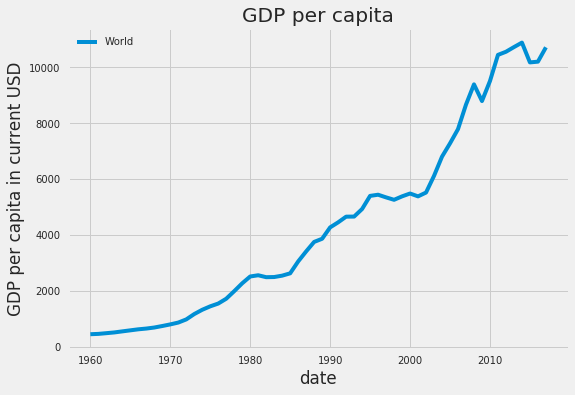

In [9]:
#GDP per capita time plot
df_gdp2= df_gdp.pivot(index='date', columns='country', values='GDP_per_head')
df_gdp2.dropna(subset=['World'])
df_gdp2.plot(y='World')
plt.title('GDP per capita')
plt.ylabel('GDP per capita in current USD')
plt.show()

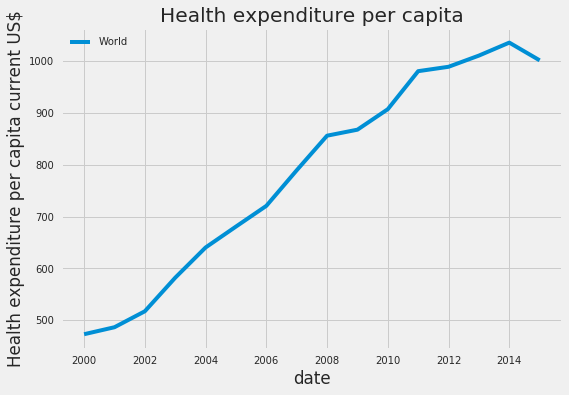

In [10]:
#Health expenditure per capita time plot
df_hexpercapita2= df_hexpercapita.pivot(index='date', columns='country', values='hexpercapita')
df_hexpercapita2.dropna(subset=['World'])
df_hexpercapita2.plot(y='World')
plt.title('Health expenditure per capita')
plt.ylabel('Health expenditure per capita current US$')
plt.show()

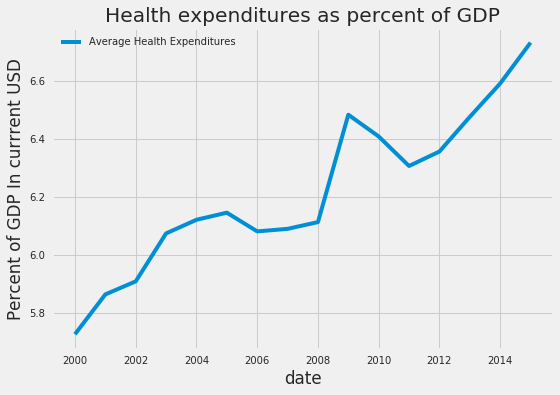

In [11]:
#Health expenditure as percent of total GDP
df_hex2= df_hex.pivot(index='date', columns='country', values='health')
df_hex2['Average Health Expenditures'] = df_hex2.mean(axis=1)
df_hex2.dropna(subset=['Average Health Expenditures'])
df_hex2.plot(y='Average Health Expenditures')
plt.title('Health expenditures as percent of GDP')
plt.ylabel('Percent of GDP In currrent USD')
plt.legend()
plt.show()

In [12]:
#Here we sort our data in ascending order based on Health expenditure per capita and count how many rows we have so we can
#divide our data in 3 groups.
df_hexgdp= pd.merge(df_hex, df_gdp, on=['country','date'],suffixes=['_date','_date'],how='inner').dropna()
df_hexgdp2015=df_hexgdp.loc[df_hexgdp['date'] == '2015-01-01']
df_hexgdp2015=df_hexgdp2015.sort_values(by=['health'], ascending=False)
count_row = df_hexgdp2015.shape[0]
print(count_row)

231


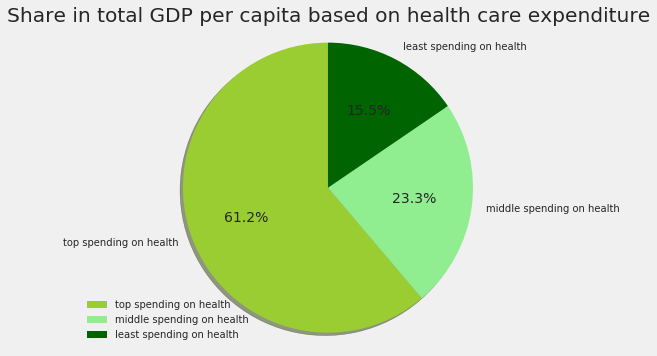

In [13]:
#Pie chart of total GDP per capita based on health expenditure per capita for 2015.
#We divide all the countries in three based on how much they spend on health (e.g. first third consists of countries
#spending more on health when compared to the rest)
df_topspending=df_hexgdp2015.iloc[0:77]
topspending=df_topspending['GDP_per_head'].sum()
df_middlespending=df_hexgdp2015.iloc[77:154]
middlespending=df_middlespending['GDP_per_head'].sum()
df_leastspending=df_hexgdp2015.iloc[-30:]
leastspending=df_leastspending['GDP_per_head'].sum()
piechart={
        'id': ['Top third spending', 'Middle third spending', 'Bottom third spending'],
        'Total GDP': [topspending, middlespending, leastspending]}
df_piechart = pd.DataFrame(piechart, columns = ['id', 'Total GDP'])
labels = list(['top spending on health', 'middle spending on health', 'least spending on health', ])
colors = ['yellowgreen', 'lightgreen', 'darkgreen']
Postive_percentage = [topspending, middlespending, leastspending, 10.0, 3.0, 5.0, 5.0]
plt.pie(df_piechart['Total GDP'], explode=None,labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Share in total GDP per capita based on health care expenditure')
plt.legend(loc=3)
plt.show()

######  Initial thoughts

What we have seen so far in the plots and in our pie chart is that GDP and health expenditure have an overall rising trend and countries that spend more on health have singificantly higher individual income.

Although we have a first idea we are still far from drawing any conclusions since we haven't yet examined the relation of GDP and healthcare expenditure and that is what we will do next.

<a id='GDP-HEALTH RELATION'></a>

## GDP-Health Expenditure relation

In this section we will explore the relation of our variables of interest.To do that we will construct a scatter plot in order to get an idea of any possible correlation and calculate the Pearson correlation index which will tell us how strong any observed correlation might be.

Next we will construct a "naive" regression in order to see how much does health expenditure per capita (which will be the only explanatory variable) affects individual income and find out if this relation is significant.


Moving on we will reach our main instrument of research which is a multiple regression. Here we will include more independent variables in order to explain better the effect on GDP per capita caused by health expenditure and get a more clear picture. Also in order to showcase that other variables also affect GDP per capita we will construct 2 scatter plots of those variables against the GDP per capita.

<a id='SCATTER'></a>

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


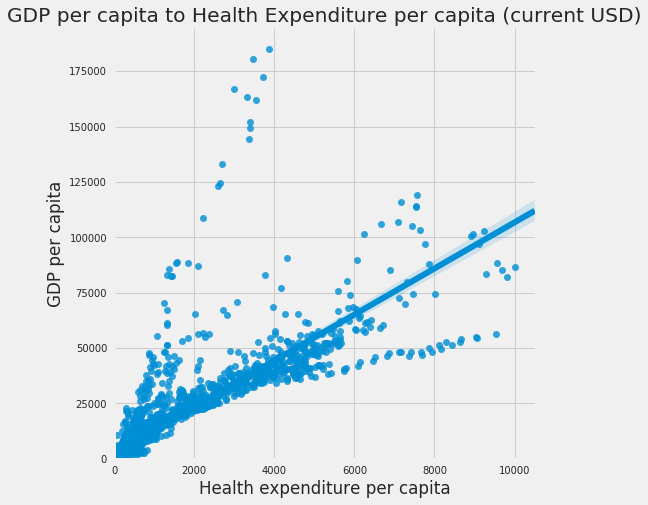

In [14]:
#Scatter plot of GDP per capita and Health Expenditure per capita
#Here we use the pairplot from the seaborn package which also has a 5% confidence interval around the regression line
df_hex2gdp= pd.merge(df_hexgdp, df_hexpercapita, on=['country','date'],suffixes=['_date','_date'],how='inner').dropna()
sns.pairplot(df_hex2gdp,x_vars='hexpercapita',y_vars='GDP_per_head',kind='reg',size=7,)
plt.xlabel('Health expenditure per capita')
plt.ylabel('GDP per capita')
plt.plot([0,100],[0,100])
plt.title('GDP per capita to Health Expenditure per capita (current USD)')
sns.plt.ylim(0, None)
sns.plt.xlim(0, None)
plt.show()

In this scatter plot we see a really strong relation between GDP per capita and Health expenditure per capita which encourages us to run a regression.

In [15]:
#Pearson correlation index
print('Pearson correlation index is', df_hex2gdp['GDP_per_head'].corr(df_hex2gdp['hexpercapita']))

Pearson correlation index is 0.8447087845837026


According to Pearson correlation index the two variables are positively and strongly correlated.

<a id='SIMPLEREG'></a>

In [16]:
#Our first simple linear regression
#We run our regression with logs instead of the absolue values for GDP and health expenditure
df_hex2gdp['log_hexpercapita'] = np.log(df_hex2gdp['hexpercapita'])
df_hex2gdp['log_GDP_per_head'] = np.log(df_hex2gdp['GDP_per_head'])
mod = smf.ols('log_GDP_per_head ~ log_hexpercapita', df_hex2gdp)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       log_GDP_per_head   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 5.523e+04
Date:                Wed, 30 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:27:40   Log-Likelihood:                -1694.6
No. Observations:                3693   AIC:                             3393.
Df Residuals:                    3691   BIC:                             3406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.5606      0.021  

A first result from this regression is that 1% change in health expenditure per capita changes GDP per capita towards the same direction by approximately 0.9%. Also as it can be seen from the p-value this result is statistically significant.

As it is logical GDP is not only affected by health expenditure and such a narrow explanation could be missleading.That's why we next run a linear regression with more independent variables in order to get a more precise answer to our question. To further justify this line of thinking we will also construct 2 scatter plots and try to see if other variables have also a possible effect on GDP per capita.

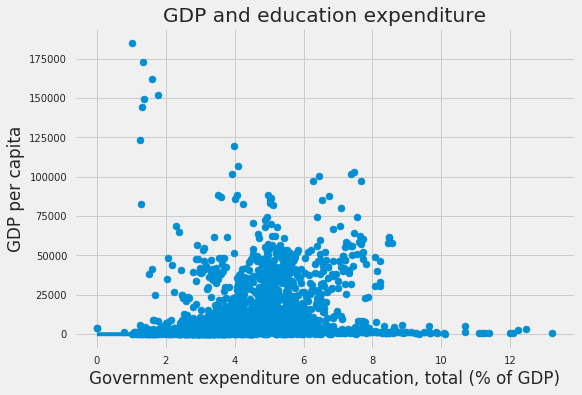

In [17]:
#Scatter plot GDP and education expenditure
df_hex2gdpeducation= pd.merge(df_hex2gdp, df_education, on=['country','date'],suffixes=['_date','_date'],how='inner').dropna()
plt.scatter(df_hex2gdpeducation.education,df_hex2gdpeducation['GDP_per_head'])
plt.plot([0,10],[0,10])
plt.title('GDP and education expenditure')
plt.xlabel('Government expenditure on education, total (% of GDP)')
plt.ylabel('GDP per capita')
plt.show()

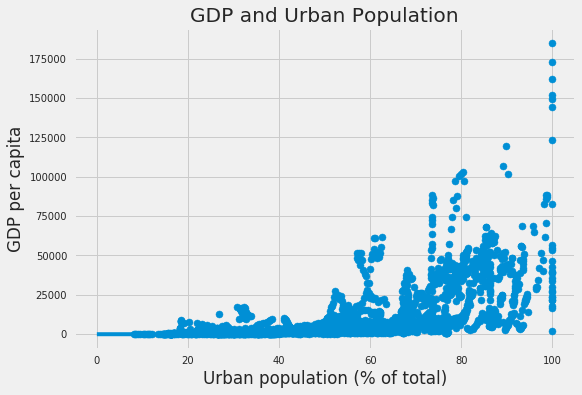

In [18]:
#GDP and Urban Population
df_hex2gdpeducationpopurban= pd.merge(df_hex2gdpeducation, df_popurban, on=['country','date'],suffixes=['_date','_date'],how='inner').dropna()
plt.scatter(df_hex2gdpeducationpopurban.popurban,df_hex2gdpeducationpopurban['GDP_per_head'])
plt.plot([0,10],[0,10])
plt.title('GDP and Urban Population')
plt.xlabel('Urban population (% of total)')
plt.ylabel('GDP per capita')
plt.show()

As we see in the 2 previous graphs GDP could be also be potentially affected by other factors. Thus, a multiple regression seems the way to go.

<a id='MULTIPLEREG'></a>

In [19]:
#Multiple linear regression
df_hex2gdpeducationpopurbanage=pd.merge(df_hex2gdpeducationpopurban, df_age, on=['country','date'],suffixes=['_date','_date'],how='inner').dropna()
df_hex2gdpeducationpopurbanageco2=pd.merge(df_hex2gdpeducationpopurbanage, df_co2, on=['country','date'],suffixes=['_date','_date'],how='inner').dropna()
X=df_hex2gdpeducationpopurbanageco2[['log_hexpercapita','education','co2','popurban','Age65']]
X=add_constant(X)
Y=df_hex2gdpeducationpopurbanageco2['log_GDP_per_head']
model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       log_GDP_per_head   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 1.167e+04
Date:                Wed, 30 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:27:41   Log-Likelihood:                -441.25
No. Observations:                2191   AIC:                             894.5
Df Residuals:                    2185   BIC:                             928.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.5769      0.025  

As stated in the output of our regression there could be a multicollinearity problem,thus we cannot interpret our findings yet, and since in theory our independent variables could be related and this aspect has to be examined.

In order to deal with multicollinearity we will first check the severity of it and which of our explanatory variables are the ones that are "responsible". We will achieve that by creating the 'Variance inflation factor'.

Then we will procceed with a partial least squares regression in order to get our final result.

<a id='multitest'></a>

In [20]:
#Variance inflation factor
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const               15.868445
log_hexpercapita     4.809234
education            1.194350
co2                  1.057040
popurban             2.567224
Age65                2.648216
dtype: float64

Using a general thumb rule of 10 we don't see any problem with our regression. Thus, there is no need to drop any of our independent variables or worry about multicollinearity.

Nevertheless we run PLS regression just to be sure our findings are correct.

<a id='PLS'></a>

In [21]:
#Partial Least Squares regression
pls = PLSRegression(n_components=5)
pls.fit(X, Y)
coeffs = pls.coef_
print(coeffs[1])

[0.89642174]


In [22]:
print('Health expenditure coefficient is', coeffs[1][0])

Health expenditure coefficient is 0.8964217396361561


As expected the result is the same,thus for every 1% change in health expenditure per capita GDP per capita increases by 0.89%.

<a id='PREDICTIONS'></a>

## Prediction of GDP and Health Expenditure

In this section we will provide 2 seperate predictions for GDP per capita and Health expenditure per capita as time series. First we will check if these variables have autocorrelation which will indicate if using the AR(1) model is meaningful.

In [23]:
#Turning our data into time series(both GDP and health expenditure)
df_gdpts=df_gdp2['World']
df_gdpts=df_gdpts.dropna()
df_gdpts.index=pd.to_datetime(df_gdpts.index)
df_hexpercapitats=df_hexpercapita2['World']
df_hexpercapitats=df_hexpercapitats.dropna()
df_hexpercapitats.index=pd.to_datetime(df_hexpercapitats.index)

In [24]:
#Here we check for autocorrelation in GDP per capita
autocorrelation = df_gdpts.autocorr()
print('GDP per capita autocorrelation index is',autocorrelation)

GDP per capita autocorrelation index is 0.996388567039874


We see that the value of autocorrelation is quite high and makes sense to move on with our AR(1) model.

<a id='GDP'></a>

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1333: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1336: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1

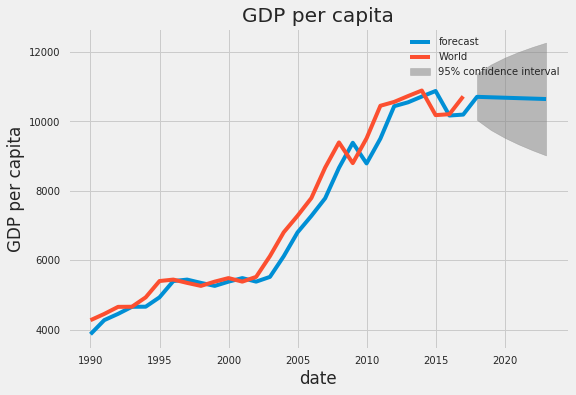

In [25]:
#Prediction 6 years in the future for GDP per capita
mod = ARMA(df_gdpts, order=(1,0))
res = mod.fit()
res.plot_predict(start=30, end=63)
plt.ylabel('GDP per capita')
plt.xlabel('date')
plt.title('GDP per capita')
plt.show()

In [26]:
#Here we check for autocorrelation in Health expenditure per capita
autocorrelation = df_hexpercapitats.autocorr()
print('Health expenditure per capita autocorrelation index is',autocorrelation)

Health expenditure per capita autocorrelation index is 0.9898968329775141


Again autocorelation is high so we can make a meaningful prediction.

<a id='HEALTH'></a>

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1333: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1336: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1

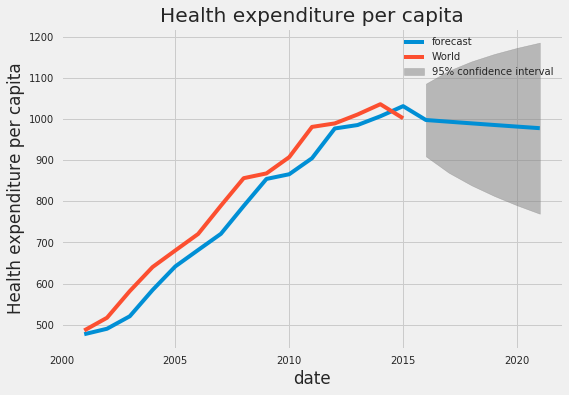

In [27]:
#Prediction 6 years in the future for Health expenditure per capita
mod = ARMA(df_hexpercapitats, order=(1,0))
res = mod.fit()
res.plot_predict(start=1, end=21)
plt.ylabel('Health expenditure per capita')
plt.xlabel('date')
plt.title('Health expenditure per capita')
plt.show()

##### Predictions conclusions

As we see in our graphs both Health expenditure per capita and GDP per capita will experience a decrease in the next few years. In both cases that decrease will be relatively small but stronger for health expenditure per capita.

### Further research

This assignment only grazed the roof of this complicated issue. One could further analyze this topic by adding more independent variables in the mutiple regression. Also there are more ways to test multicollinearity, while as for the prediction one could also chek for seasonality and stationarity.

[Back to the top](#top)